# Stock Prices Prediction Using Keras & Long Short Term Memory(LSTM)

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

## Part 1: Data Preprocessing

In [3]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
# To see what the data looks like
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2: Building RNN

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### 2.1: Training the Model

In [12]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)



Epoch 1/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0031
Epoch 2/50
62/62 [==============================] - 8s 127ms/step - loss: 0.0023
Epoch 3/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0022
Epoch 4/50
62/62 [==============================] - 8s 125ms/step - loss: 0.0020
Epoch 5/50
62/62 [==============================] - 8s 131ms/step - loss: 0.0021
Epoch 6/50
62/62 [==============================] - 8s 127ms/step - loss: 0.0024
Epoch 7/50
62/62 [==============================] - 8s 129ms/step - loss: 0.0020
Epoch 8/50
62/62 [==============================] - 8s 132ms/step - loss: 0.0019
Epoch 9/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0017
Epoch 10/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0024
Epoch 11/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0021
Epoch 12/50
62/62 [==============================] - 8s 135ms/step - loss: 0.0019
Epoch 13/50
62/62 [======

## Part 3: Making Predictions and Visualizing the Results

In [18]:
# Getting the real stock price of 2017

# Load Test Data
dataset_test = pd.read_csv('tatatest.csv')

real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


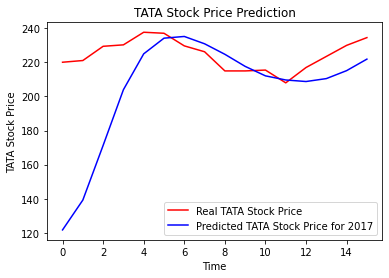

In [21]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price for 2017')

plt.title('TATA Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('TATA Stock Price')

plt.legend()
plt.show()